## Imports

In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Assignment

### Pre-processing

In [78]:
# In a single cell because it takes a long time and doesn't need to be ran everytime
y, x = load_data(train=True, DER=True) # Load data
y_indexes, x_test = load_data(train=False, DER=True)

In [79]:
x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8, np.random.seed())
x_tr = replace_min_999_by_col_mean(x_tr) # Handle invalid values
x_te = replace_min_999_by_col_mean(x_te)

x_tr = build_poly_2(x_tr) # Poly exp deg=2
x_te = build_poly_2(x_te)

x_tr, mean_x_tr, std_x_tr = standardize(x_tr) # Standardize x
x_te, mean_x_te, std_x_te = standardize(x_te)

tx_tr = add_x_bias(x_tr) # Add bias after normalisation to avoid NaNs
tx_te = add_x_bias(x_te)

In [80]:
print(tx_tr.shape)

(200000, 105)


### Linear regression using gradient descent

In [26]:
# We run GD step times per epoch, for epochs epochs (same as running GD for epochs*step just lets us print intermediate results)
w_GD, epochs, step, gamma = np.zeros(61), 100, 150, 1e-4
loss_tr_GD = []
loss_te_GD = []
for i in range((int)(epochs)):
    w_GD, loss_tr = mean_squared_error_gd(y_tr, tx_tr, w_GD, step, gamma)
    loss_te = compute_mse(y_te, tx_te, w_GD)
    loss_tr_GD.append(loss_tr)
    loss_te_GD.append(loss_te)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.16689938037489174 Test loss: 0.16591489409642565
Epoch 1 : Training loss: 0.16281040748432146 Test loss: 0.1618482002087165
Epoch 2 : Training loss: 0.15915838758495704 Test loss: 0.15821872131324466
Epoch 3 : Training loss: 0.1558605556761018 Test loss: 0.15494282487812447
Epoch 4 : Training loss: 0.15285387256211264 Test loss: 0.15195701177239254
Epoch 5 : Training loss: 0.15008983679697252 Test loss: 0.14921257622772435
Epoch 6 : Training loss: 0.1475307337687426 Test loss: 0.146671754658872
Epoch 7 : Training loss: 0.14514691212096378 Test loss: 0.14430493675181524
Epoch 8 : Training loss: 0.1429147964637335 Test loss: 0.14208863628351315
Epoch 9 : Training loss: 0.140815429362198 Test loss: 0.14000400682859163
Epoch 10 : Training loss: 0.13883339510517137 Test loss: 0.13803574953993375
Epoch 11 : Training loss: 0.13695601994737053 Test loss: 0.13617130410814512
Epoch 12 : Training loss: 0.1351727734628147 Test loss: 0.134400245130436
Epoch 13 : Training 

#### Plotting the resulting losses

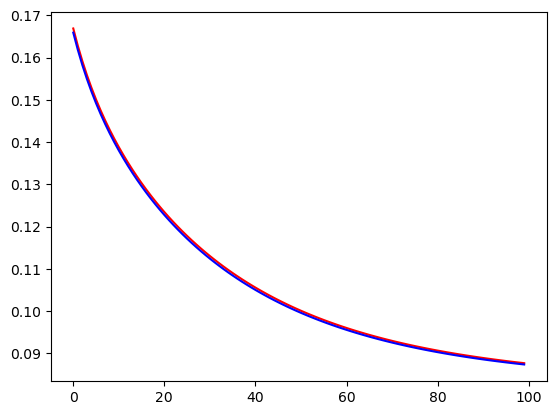

In [29]:
plt.plot(range(len(loss_tr_GD)), loss_tr_GD, c='red')
plt.plot(range(len(loss_te_GD)), loss_te_GD, c='blue')

#### Calculating the accuracy on the test set (with predictions = -1 or 1)

In [52]:
accuracy = compute_accuracy(tx_te, y_te, w_GD, 0)
print(f"Accuracy for these w: {accuracy*100}%")

Accuracy for these w: 41.306%


In [53]:
x_test_GD = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test_GD = build_poly_2(x_test_GD, 2) # Build polynomial expansion

x_test_GD, mean_x_test_GD, std_x_test_GD = standardize(x_test_GD) # Standardize x

tx_test_GD = add_x_bias(x_test_GD)

y_hat = build_prediction(tx_test_GD, w_GD, 0.4) # threshold of 0.4 found experimentally - mention in report
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv")

### Linear regression using stochastic gradient descent

In [35]:
w_SGD, epochs, step, gamma = np.zeros(61), 10, 100, 1e-4
for i in range((int)(epochs)):
    w_SGD, loss_tr = mean_squared_error_sgd(y_tr, tx_tr, w_SGD, step, gamma)
    loss_te = compute_mse(y_te, tx_te, w_SGD)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.16876579557824564 Test loss: 0.16776478582371565
Epoch 1 : Training loss: 0.1664301099626231 Test loss: 0.1654465564074718
Epoch 2 : Training loss: 0.1639051521254742 Test loss: 0.16293967358366115
Epoch 3 : Training loss: 0.1608389564148647 Test loss: 0.1598888346150941
Epoch 4 : Training loss: 0.15923832879645863 Test loss: 0.15829178971831984
Epoch 5 : Training loss: 0.15618143009739904 Test loss: 0.15525117703978544
Epoch 6 : Training loss: 0.15506805598853657 Test loss: 0.1541347314270512
Epoch 7 : Training loss: 0.15267414494620074 Test loss: 0.15175533660011073
Epoch 8 : Training loss: 0.1512065115963263 Test loss: 0.15030009750041332
Epoch 9 : Training loss: 0.1495275167101783 Test loss: 0.14861867209063506


#### Calculating the accuracy on the test set (with predictions = 0 or 1)

In [36]:
y_hat_cont = tx_te@w_SGD
y_hat = [1 if yi > 0.40 else 0 for yi in y_hat_cont]
accuracy = 1-abs(y_te-y_hat).mean()
print(f"Accuracy for these w: {accuracy*100}%")

Accuracy for these w: 66.22600000000001%


### Least squares

In [37]:
w_LS, loss_tr = least_squares(y_tr, tx_tr)
loss_te = compute_mse(y_te, tx_te, w_LS)
print(f"Training loss: {loss_tr}\nTest loss: {loss_te}")

Training loss: 0.07893029210502374
Test loss: 0.4803123114339245


In [38]:
y_hat_cont = tx_te@w_LS
y_hat = [1 if yi > 0.45 else 0 for yi in y_hat_cont]
accuracy = 1-abs(y_te-y_hat).mean()
print(f"Accuracy for these w: {accuracy*100}%")

Accuracy for these w: 63.528000000000006%


### Ridge regression

In [39]:
lambda_ = 0.1
w_REG, loss_tr = ridge_regression(y_tr, tx_tr, lambda_)
print(f"Training loss: {loss_tr}\n")

Training loss: 0.08429551564465801



In [40]:
y_hat_cont = tx_te@w_REG
y_hat = [1 if yi > 0.44 else 0 for yi in y_hat_cont]
accuracy = 1-abs(y_te-y_hat).mean()
print(f"Accuracy for these w: {accuracy*100}%")

Accuracy for these w: 75.38199999999999%


### Logistic regression using gradient descent or SGD (y ∈ {0, 1})

In [82]:
# We run GD step times per epoch, for epochs epochs (same as running GD for epochs*step just lets us print intermediate results)
w_GD_log, epochs, step, gamma = np.zeros(105), 100, 100, 1e-1
loss_tr_GD_log = []
loss_te_GD_log = []
for i in range((int)(epochs)):
    w_GD_log, loss_tr = logistic_regression(y_tr, tx_tr, w_GD_log, step, gamma)
    loss_te = compute_log_loss(y_te, tx_te, w_GD_log)
    loss_tr_GD_log.append(loss_tr)
    loss_te_GD_log.append(loss_te)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.5047149171786687 Test loss: 0.5026337588755009
Epoch 1 : Training loss: 0.4910090191880656 Test loss: 0.4895891625108363
Epoch 2 : Training loss: 0.4835449901981204 Test loss: 0.4827631987529457
Epoch 3 : Training loss: 0.4783172072757554 Test loss: 0.47791065359082097
Epoch 4 : Training loss: 0.47431805479914363 Test loss: 0.4741455247042955
Epoch 5 : Training loss: 0.4711077765146115 Test loss: 0.47110088127793937
Epoch 6 : Training loss: 0.4684447257510413 Test loss: 0.4685667600290032
Epoch 7 : Training loss: 0.46618444123303104 Test loss: 0.466408730108515
Epoch 8 : Training loss: 0.46423133242192316 Test loss: 0.46453628343765613
Epoch 9 : Training loss: 0.46251828823386 Test loss: 0.46288707614078617
Epoch 10 : Training loss: 0.4609968861351362 Test loss: 0.4614169125377075
Epoch 11 : Training loss: 0.4596315264389842 Test loss: 0.46009346078246327
Epoch 12 : Training loss: 0.45839552714943016 Test loss: 0.4588923380544545
Epoch 13 : Training loss: 0.4

#### Plotting the resulting losses

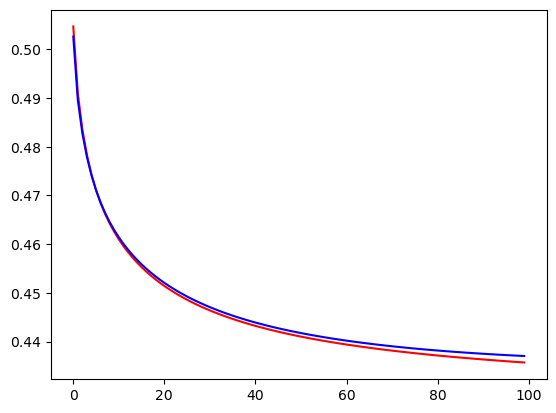

In [83]:
plt.plot(range(len(loss_tr_GD_log)), loss_tr_GD_log, c='red')
plt.plot(range(len(loss_te_GD_log)), loss_te_GD_log, c='blue')

#### Calculating the accuracy on the test set (with predictions = -1 or 1)

In [84]:
accuracy = compute_accuracy_log(tx_te, y_te, w_GD_log, threshold=0.5)
print(f"Accuracy for these w: {accuracy*100}%")

Accuracy for these w: 80.43%


In [85]:
x_test_log = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test_log = build_poly_2(x_test_log)

x_test_log, mean_x_test_log, std_x_test_log = standardize(x_test_log) # Standardize x

tx_test_log = add_x_bias(x_test_log)

y_hat = build_prediction_log(tx_test_log, w_GD_log, threshold=0.5, minus_one = True)
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv")

### Regularized logistic regression using gradient descent or SGD (y ∈ {0, 1}, with regularization term λ∥w∥**2)